In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


#K-mean 군집화

(600, 800, 3)


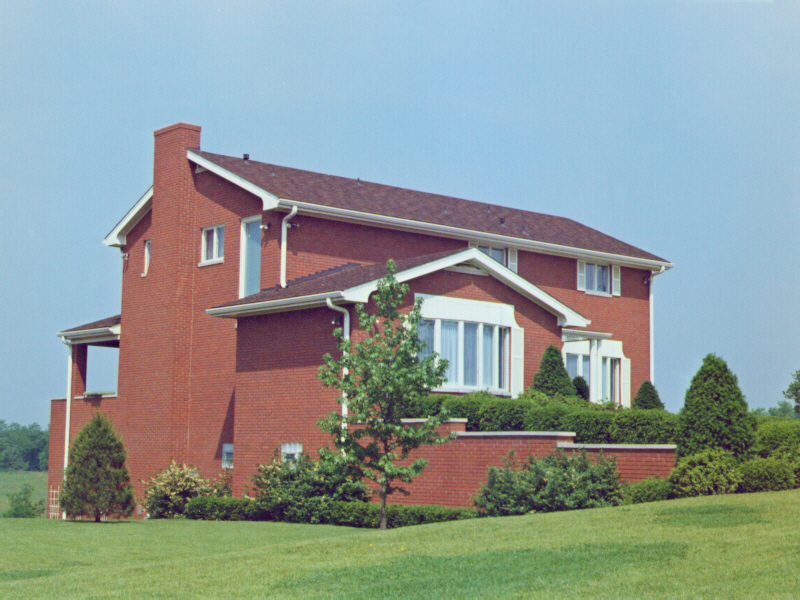

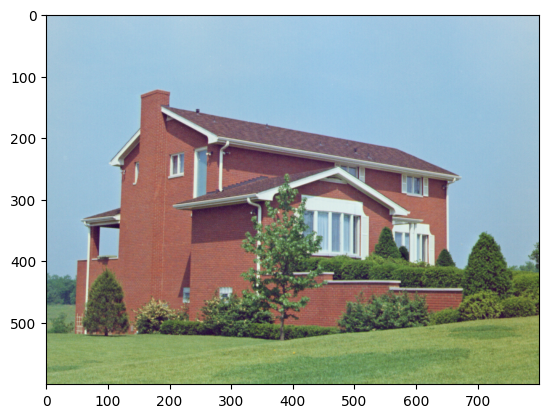

In [24]:
img = cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/Images/home3.jpg')

#print(img.shape)
#cv2_imshow(img)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(RGB_img)

#gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
cv2_imshow(img)
plt.imshow(RGB_img)

In [25]:
# 영상의 구조 변경
Z = img.reshape((-1, 3))
print(Z.shape)

(480000, 3)


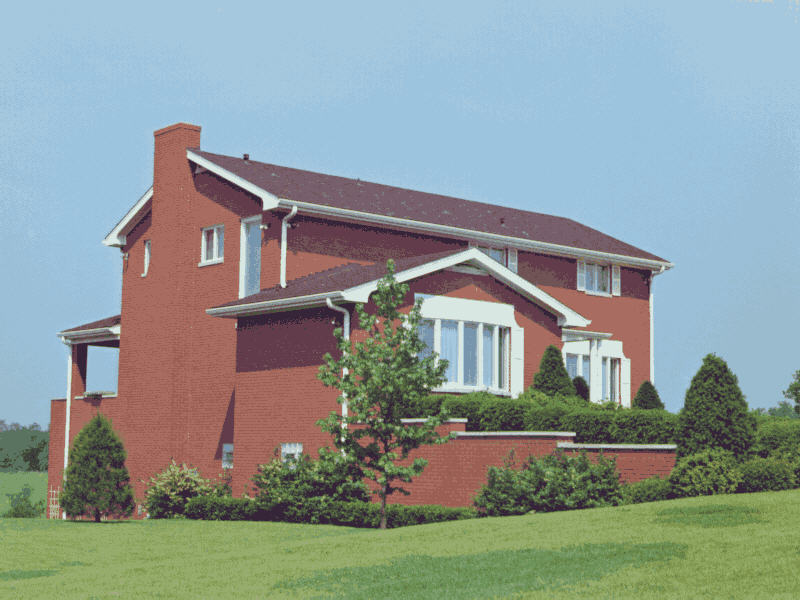

In [26]:
# k-mean 에 적용하기 위해 데이터 타입 변경
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) # 기준을 정의
K = 30 # 군집 개수
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# 픽셀로 표현하기 위해 배열의 값을 unit8 형식으로 되돌리기
center = np.uint8(center)

# label 배열을 행 벡터로 재조정하고 레이블에 해당하는 R, G, B 중심값을 res에 리턴
res = center[label.flatten()]
res2 = res.reshape((img.shape))

cv2_imshow(res2)

(256, 256, 3)


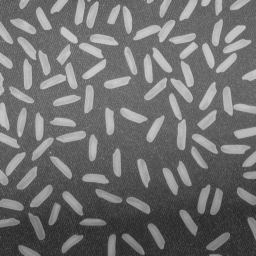

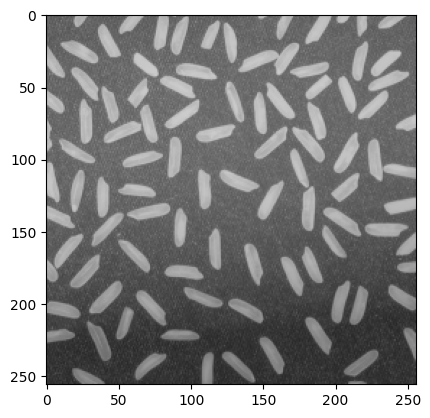

In [19]:
img = cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/Images/rice.bmp')

#print(img.shape)
#cv2_imshow(img)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(RGB_img)

#gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
cv2_imshow(img)
plt.imshow(RGB_img)

In [20]:
# 영상의 구조 변경
Z = img.reshape((-1, 3))
print(Z.shape)

(65536, 3)


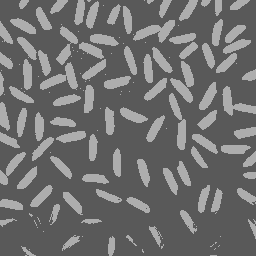

In [23]:
# k-mean 에 적용하기 위해 데이터 타입 변경
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) # 기준을 정의
K = 2 # 군집 개수
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# 픽셀로 표현하기 위해 배열의 값을 unit8 형식으로 되돌리기
center = np.uint8(center)

# label 배열을 행 벡터로 재조정하고 레이블에 해당하는 R, G, B 중심값을 res에 리턴
res = center[label.flatten()]
res2 = res.reshape((img.shape))

cv2_imshow(res2)

이미지의 특성인 2차원을 1차원으로 전환하면서 공간적 특성을 고려하지 못하는 문제

## 영역 레이블링 (카운팅)

(256, 256)


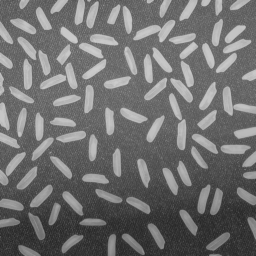

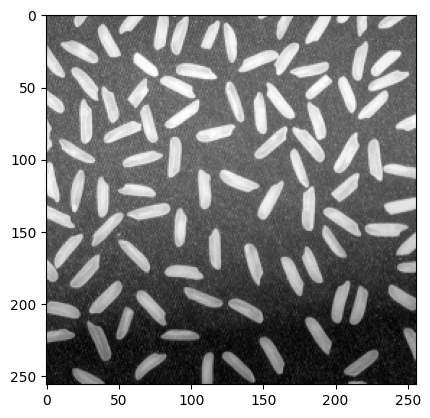

In [27]:
img = cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/Images/rice.bmp')

#print(img.shape)
#cv2_imshow(img)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(RGB_img)

gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gimg.shape)
cv2_imshow(gimg)
plt.imshow(gimg, cmap='gray')

In [28]:
gBin = np.zeros((gimg.shape[0], gimg.shape[1]), dtype=np.ubyte) # 이진 이미지를 위한 변수

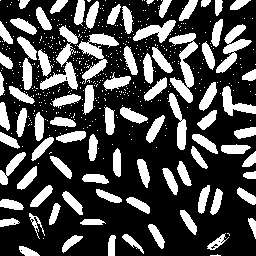

In [29]:
threshold = 120

for h in range(gimg.shape[0]):
    for w in range(gimg.shape[1]):
        if (gimg[h, w] > threshold):
            gBin[h, w] = 255

cv2_imshow(gBin)

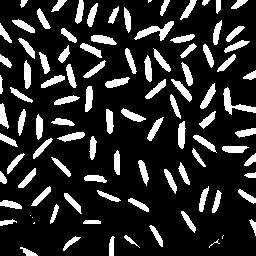

In [30]:
kernel = np.ones((3, 3), np.uint8) # 3x3의 구조요소
erodeImg = cv2.erode(gBin, kernel, iterations = 1)
cv2_imshow(erodeImg)

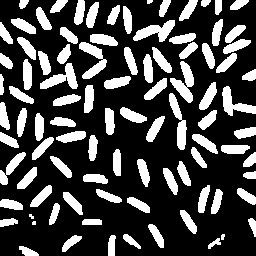

In [31]:
kernel = np.ones((3, 3), np.uint8) # 3x3의 구조요소
dilateImg = cv2.dilate(erodeImg, kernel, iterations = 1)
cv2_imshow(dilateImg)

In [32]:
num_labels, labels = cv2.connectedComponents(dilateImg)
print('number of labels :', num_labels)

number of labels : 95


## 외곽선 추적 기법